In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

"다음 분기에 어떤 게임을 설계해야 할까" << 우리의 목표

In [2]:
df = pd.read_csv('vgames2.csv', index_col=[0]) #unnamed col 없애기

#데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [3]:
#결측값 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
#결측값 제거
df = df.dropna()
df = df.reset_index(drop=True)

16598개의 row 중 약 250~400개의 row가 결측값인것을 확인, imputation이 아닌 제거를 하기로 선택

In [5]:
df.info() #약 350개의 row 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
df.head(7)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0


In [7]:
#Year데이터 확인
df['Year'] = df['Year'].astype(int).copy()
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [8]:
#특이값을 갖는 행 / 조건 열 생성
df['Y'] = np.nan
df.loc[((80 < df['Year']) & (df['Year'] < 100)), 'Y'] = 1
df.loc[df['Y'] != 1 , 'Y'] = 0
df.loc[((0 <= df['Year']) & (df['Year'] < 20)), 'Y'] = 2

In [9]:
df['Y'].value_counts()

0.0    16141
2.0       86
1.0       14
Name: Y, dtype: int64

In [10]:
#null값 데이터 열 생성
df['year'] = np.nan

#for문을 활용한 연도계산
for i in range(len(df)):
    if df['Y'].iloc[i] == 1:
        df['year'].iloc[i] = df['Year'].iloc[i] + 1900
    elif df['Y'].iloc[i] == 2:
        df['year'].iloc[i] = df['Year'].iloc[i] + 2000
    else:
        df['year'].iloc[i] = df['Year'].iloc[i]

/Users/perrito/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
#어떤 요소로 구성되어 있는지 확인
df['NA_Sales'].value_counts()

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
        ... 
1.86       1
6.91       1
3.88       1
4.14       1
4.18       1
Name: NA_Sales, Length: 489, dtype: int64

In [12]:
#어떤 요소로 구성되어 있는지 확인
df['NA_Sales'].unique() #NA열만 확인 한 후, 다른 열에서도 동일한 형태로 나타날것이라 판단 동일 작성 진행

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

'M'과 'K'라는 단위가 달려 있으며, 소수점형태로 나타남 -> numeric형태로 변환이 필요함

K, M 정보를 담은 열 생성한 뒤, numeric변수로 변환, 각 단위에 맞도록 곱셈 진행



In [13]:
#특이값을 갖는 행 / 조건 열 생성
df.loc[df['NA_Sales'].str.contains('K').astype(int) == 1, 'N'] = 1
df.loc[df['N'] != 1 , 'N'] = 0
df.loc[df['NA_Sales'].str.contains('M').astype(int) == 1, 'N'] = 2

df.loc[df['EU_Sales'].str.contains('K').astype(int) == 1, 'E'] = 1
df.loc[df['E'] != 1 , 'E'] = 0
df.loc[df['EU_Sales'].str.contains('M').astype(int) == 1, 'E'] = 2

df.loc[df['JP_Sales'].str.contains('K').astype(int) == 1, 'J'] = 1
df.loc[df['J'] != 1 , 'J'] = 0
df.loc[df['JP_Sales'].str.contains('M').astype(int) == 1, 'J'] = 2

df.loc[df['Other_Sales'].str.contains('K').astype(int) == 1, 'O'] = 1
df.loc[df['O'] != 1 , 'O'] = 0
df.loc[df['Other_Sales'].str.contains('M').astype(int) == 1, 'O'] = 2

In [14]:
'''#K, M값을 갖는 column 생성
df['N_k'] = df['NA_Sales'].str.contains('K').astype(int)
df['N_m'] = df['NA_Sales'].str.contains('M').astype(int)
df['E_k'] = df['EU_Sales'].str.contains('K').astype(int)
df['E_m'] = df['EU_Sales'].str.contains('M').astype(int)
df['J_k'] = df['JP_Sales'].str.contains('K').astype(int)
df['J_m'] = df['JP_Sales'].str.contains('M').astype(int)
df['O_k'] = df['Other_Sales'].str.contains('K').astype(int)
df['O_m'] = df['Other_Sales'].str.contains('M').astype(int)'''

"#K, M값을 갖는 column 생성\ndf['N_k'] = df['NA_Sales'].str.contains('K').astype(int)\ndf['N_m'] = df['NA_Sales'].str.contains('M').astype(int)\ndf['E_k'] = df['EU_Sales'].str.contains('K').astype(int)\ndf['E_m'] = df['EU_Sales'].str.contains('M').astype(int)\ndf['J_k'] = df['JP_Sales'].str.contains('K').astype(int)\ndf['J_m'] = df['JP_Sales'].str.contains('M').astype(int)\ndf['O_k'] = df['Other_Sales'].str.contains('K').astype(int)\ndf['O_m'] = df['Other_Sales'].str.contains('M').astype(int)"

In [15]:
#K, M인자 제거
df['NA_Sales'] = df['NA_Sales'].replace(['K', 'M'], ['', ''], regex=True)
df['EU_Sales'] = df['EU_Sales'].replace(['K', 'M'], ['', ''], regex=True)
df['JP_Sales'] = df['JP_Sales'].replace(['K', 'M'], ['', ''], regex=True)
df['Other_Sales'] = df['Other_Sales'].replace(['K', 'M'], ['', ''], regex=True)

In [16]:
#numeric 변환
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

In [17]:
#소수점이 존재하는 채로 진행하는 단위환산을 위해 새로운 데이터 프레임 생성 
data = df.copy()

In [18]:
#null값 데이터 열 생성
df['n_s'] = np.nan
df['e_s'] = np.nan
df['j_s'] = np.nan
df['o_s'] = np.nan

#for문을 활용한 소수점 없이 단위환산
for i in range(len(df)):
    if df['N'].iloc[i] == 1:
        df['n_s'].iloc[i] = df['NA_Sales'].iloc[i]*1000*100
    elif df['N'].iloc[i] == 2:
        df['n_s'].iloc[i] = df['NA_Sales'].iloc[i]*1000000*100
    else:
        df['n_s'].iloc[i] = df['NA_Sales'].iloc[i]*100

for i in range(len(df)):
    if df['E'].iloc[i] == 1:
        df['e_s'].iloc[i] = df['EU_Sales'].iloc[i]*1000*100
    elif df['E'].iloc[i] == 2:
        df['e_s'].iloc[i] = df['EU_Sales'].iloc[i]*1000000*100
    else:
        df['e_s'].iloc[i] = df['EU_Sales'].iloc[i]*100

for i in range(len(df)):
    if df['J'].iloc[i] == 1:
        df['j_s'].iloc[i] = df['JP_Sales'].iloc[i]*1000*100
    elif df['J'].iloc[i] == 2:
        df['j_s'].iloc[i] = df['JP_Sales'].iloc[i]*1000000*100
    else:
        df['j_s'].iloc[i] = df['JP_Sales'].iloc[i]*100

for i in range(len(df)):
    if df['O'].iloc[i] == 1:
        df['o_s'].iloc[i] = df['Other_Sales'].iloc[i]*1000*100
    elif df['O'].iloc[i] == 2:
        df['o_s'].iloc[i] = df['Other_Sales'].iloc[i]*1000000*100
    else:
        df['o_s'].iloc[i] = df['Other_Sales'].iloc[i]*100

/Users/perrito/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
#null값 데이터 열 생성
data['n_s'] = np.nan
data['e_s'] = np.nan
data['j_s'] = np.nan
data['o_s'] = np.nan

#for문을 활용한 소수점 있게 단위환산
for i in range(len(data)):
    if data['N'].iloc[i] == 1:
        data['n_s'].iloc[i] = data['NA_Sales'].iloc[i]*1000
    elif data['N'].iloc[i] == 2:
        data['n_s'].iloc[i] = data['NA_Sales'].iloc[i]*1000000
    else:
        data['n_s'].iloc[i] = data['NA_Sales'].iloc[i]

for i in range(len(data)):
    if data['E'].iloc[i] == 1:
        data['e_s'].iloc[i] = data['EU_Sales'].iloc[i]*1000
    elif data['E'].iloc[i] == 2:
        data['e_s'].iloc[i] = data['EU_Sales'].iloc[i]*1000000
    else:
        data['e_s'].iloc[i] = data['EU_Sales'].iloc[i]

for i in range(len(data)):
    if data['J'].iloc[i] == 1:
        data['j_s'].iloc[i] = data['JP_Sales'].iloc[i]*1000
    elif data['J'].iloc[i] == 2:
        data['j_s'].iloc[i] = data['JP_Sales'].iloc[i]*1000000
    else:
        data['j_s'].iloc[i] = data['JP_Sales'].iloc[i]

for i in range(len(data)):
    if data['O'].iloc[i] == 1:
        data['o_s'].iloc[i] = data['Other_Sales'].iloc[i]*1000
    elif data['O'].iloc[i] == 2:
        data['o_s'].iloc[i] = data['Other_Sales'].iloc[i]*1000000
    else:
        data['o_s'].iloc[i] = data['Other_Sales'].iloc[i]

/Users/perrito/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Y            16241 non-null  float64
 10  year         16241 non-null  float64
 11  N            16241 non-null  float64
 12  E            16241 non-null  float64
 13  J            16241 non-null  float64
 14  O            16241 non-null  float64
 15  n_s          16241 non-null  float64
 16  e_s          16241 non-null  float64
 17  j_s          16241 non-null  float64
 18  o_s          16241 non-null  float64
dtypes: f

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Y            16241 non-null  float64
 10  year         16241 non-null  float64
 11  N            16241 non-null  float64
 12  E            16241 non-null  float64
 13  J            16241 non-null  float64
 14  O            16241 non-null  float64
 15  n_s          16241 non-null  float64
 16  e_s          16241 non-null  float64
 17  j_s          16241 non-null  float64
 18  o_s          16241 non-null  float64
dtypes: f

In [22]:
#앞으로 사용할 df1자료 생성
df1 = df.iloc[:, np.r_[0:2, 3, 4, 10, 15:19]].copy()
data2 = data.iloc[:, np.r_[0:2, 3, 4, 10, 15:19]].copy()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16241 non-null  object 
 1   Platform   16241 non-null  object 
 2   Genre      16241 non-null  object 
 3   Publisher  16241 non-null  object 
 4   year       16241 non-null  float64
 5   n_s        16241 non-null  float64
 6   e_s        16241 non-null  float64
 7   j_s        16241 non-null  float64
 8   o_s        16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16241 non-null  object 
 1   Platform   16241 non-null  object 
 2   Genre      16241 non-null  object 
 3   Publisher  16241 non-null  object 
 4   year       16241 non-null  float64
 5   n_s        16241 non-null  float64
 6   e_s        16241 non-null  float64
 7   j_s        16241 non-null  float64
 8   o_s        16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


데이터 시각화를 위해 새로운 컬럼 생성 및 group by 진행 (눈에 잘 띄게 하기 위해 *100한 df1데이터를 사용)

In [26]:
#전체 출고량 column 생성
df1['all_s'] = df1['n_s'] + df1['e_s'] + df1['j_s'] + df1['o_s']

In [27]:
#장르별 - (전체)출고량의 합
group_gen = df1.groupby(['Genre'], as_index=False)['all_s'].sum().sort_values(by='all_s', ascending=False)

In [28]:
group_gen

,Genre,all_s
0,Action,3.128168e+09
8,Shooter,1.935101e+09
10,Sports,1.779129e+09
7,Role-Playing,1.661088e+09
6,Racing,1.469071e+09
4,Platform,1.411081e+09
3,Misc,7.790772e+08
9,Simulation,5.700384e+08
2,Fighting,4.620439e+08
11,Strategy,2.520170e+08


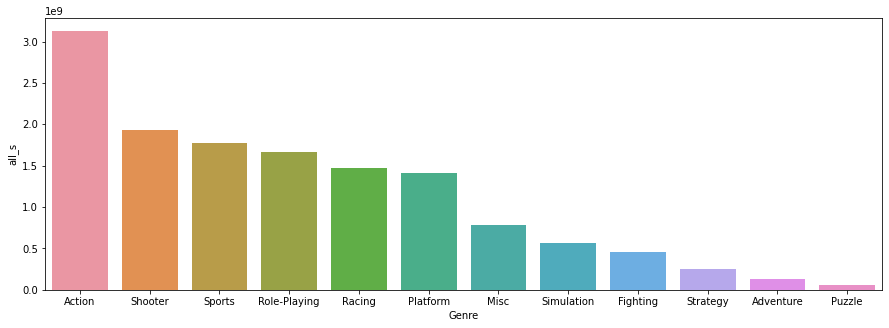

In [29]:
#barplot형태 확인
plt.figure(figsize=(15, 5))
sns.barplot(x='Genre', y='all_s', data=group_gen)

In [30]:
#플랫폼 - (전체)출고량 합
group_plat = df1.groupby(['Platform'], as_index=False)['all_s'].sum().sort_values(by='all_s', ascending=False)

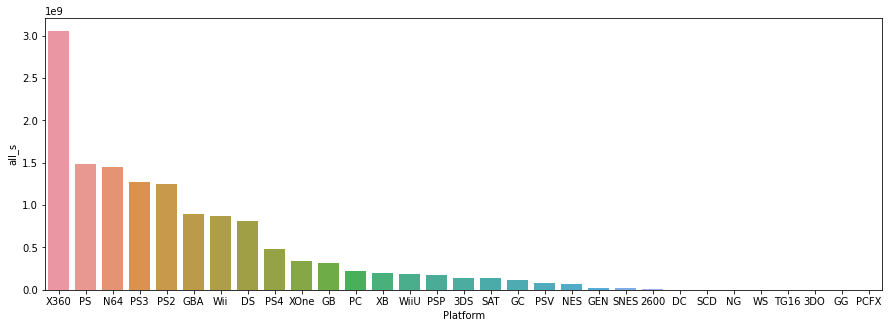

In [31]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Platform', y='all_s', data=group_plat)

In [32]:
#플랫폼 - (전체)출고량 합
group_gen_plat = df1.groupby(['Genre', 'Platform'], as_index=False)['all_s'].sum().sort_values(by='all_s', ascending=False)

In [33]:
group_gen_plat

,Genre,Platform,all_s
21,Action,X360,1.202023e+09
219,Shooter,X360,1.099027e+09
154,Racing,N64,5.740033e+08
13,Action,PS3,4.400297e+08
258,Sports,PS2,4.320257e+08
...,...,...,...
137,Puzzle,PS4,2.000000e+00
255,Sports,NG,2.000000e+00
216,Shooter,TG16,2.000000e+00
223,Simulation,3DO,2.000000e+00


In [34]:
group_gen_plat['Platform'].unique()

array(['X360', 'N64', 'PS3', 'PS2', 'PS', 'GBA', 'Wii', 'PS4', 'GB', 'DS',
       'WiiU', 'XOne', 'SAT', 'PC', 'XB', 'GC', 'NES', '3DS', 'PSV',
       'PSP', 'GEN', 'SNES', '2600', 'DC', 'SCD', 'NG', 'WS', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

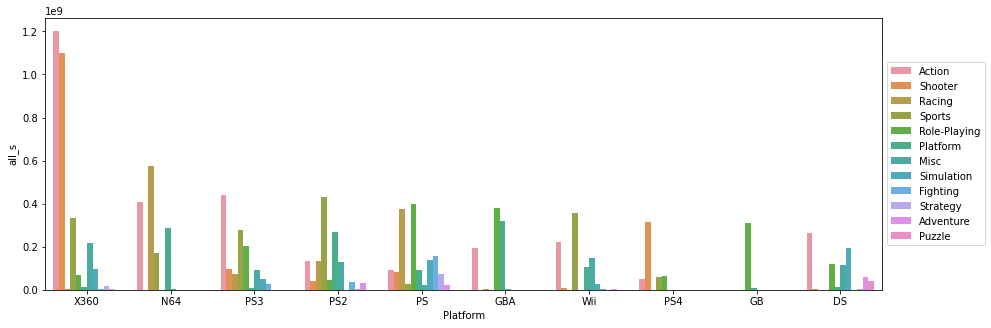

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Platform', y='all_s', hue='Genre', data=group_gen_plat[group_gen_plat['Platform'].isin(['X360', 'N64', 'PS3', 'PS2', 'PS', 'GBA', 'Wii', 'PS4', 'GB', 'DS'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

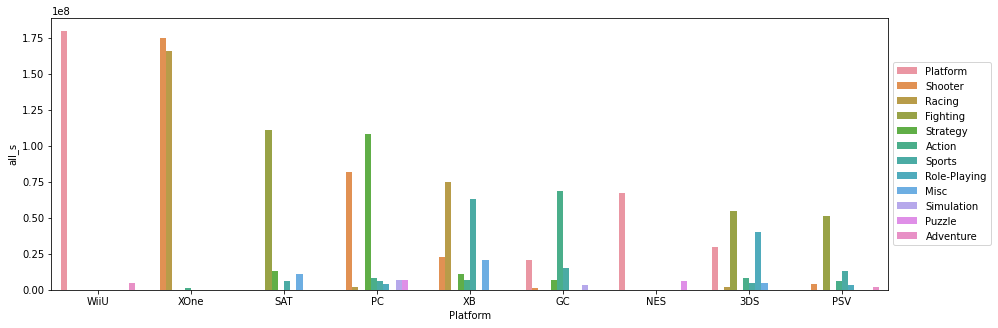

In [36]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Platform', y='all_s', hue='Genre', data=group_gen_plat[group_gen_plat['Platform'].isin(['WiiU', 'XOne', 'SAT', 'PC', 'XB', 'GC', 'NES', '3DS', 'PSV'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

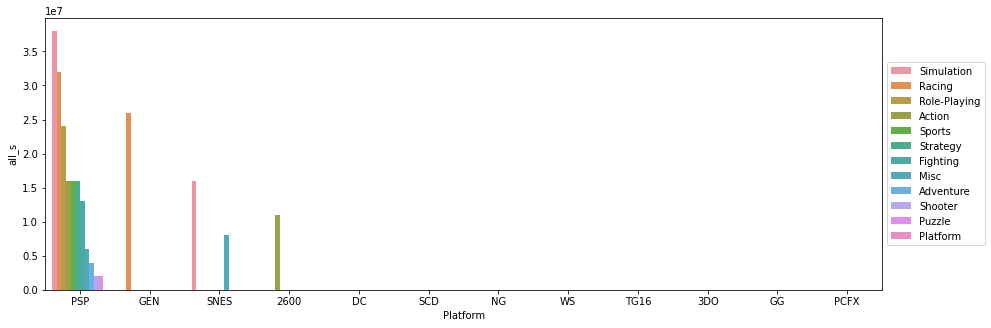

In [37]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Platform', y='all_s', hue='Genre', data=group_gen_plat[group_gen_plat['Platform'].isin(['PSP', 'GEN', 'SNES', '2600', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [38]:
#지역별 
df_melt = df1.iloc[:, np.r_[2, 5:10]].copy()
region_melt = pd.melt(df_melt, id_vars='Genre', var_name='region', value_name='region_sales')

In [39]:
region_melt

,Genre,region,region_sales
0,Action,n_s,4.0
1,Action,n_s,17.0
2,Adventure,n_s,0.0
3,Misc,n_s,4.0
4,Platform,n_s,12.0
...,...,...,...
81200,Platform,all_s,20.0
81201,Action,all_s,1.0
81202,Sports,all_s,79.0
81203,Action,all_s,38.0


In [40]:
df_melt = region_melt.groupby(['Genre', 'region'], as_index=False)['region_sales'].sum().sort_values(by='region_sales', ascending=False)

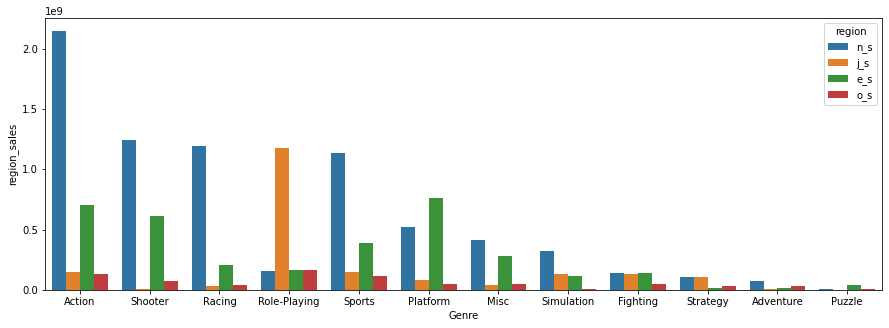

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Genre', y='region_sales', hue='region', data=df_melt.drop(index = df_melt[df_melt['region'] == 'all_s'].index))

In [42]:
#1980을 시작점으로 10년단위로 묶기
print(df1['year'].unique())
print(df1['year'].min())
print(df1['year'].max())

[2008. 2009. 2010. 2005. 2011. 2007. 2001. 2003. 2006. 2014. 2015. 2002.
 1997. 2013. 1996. 2004. 2000. 1984. 1998. 2016. 1985. 1999. 1995. 1993.
 2012. 1987. 1982. 1994. 1990. 1992. 1991. 1983. 1988. 1981. 1989. 1986.
 2017. 1980. 2020.]
1980.0
2020.0


In [43]:
df1['y'] = np.nan
df1.loc[((1980 <= df1['year']) & (df1['year'] < 1990)), 'y'] = '1980to1990'
df1.loc[df1['y'] != '1980to1990' , 'y'] = '2010to2020'
df1.loc[((1990 <= df1['year']) & (df1['year'] < 2000)), 'y'] = '1990to2000'
df1.loc[((2000 <= df1['year']) & (df1['year'] < 2010)), 'y'] = '2000to2010'

In [44]:
group_year = df1.groupby(['Genre', 'y'], as_index=False)['all_s'].sum().sort_values(by='all_s', ascending=False)

In [45]:
group_year

,Genre,y,all_s
3,Action,2010to2020,1.649065e+09
35,Shooter,2010to2020,1.614045e+09
42,Sports,2000to2010,1.063079e+09
2,Action,2000to2010,9.670843e+08
30,Role-Playing,2000to2010,9.460403e+08
25,Racing,1990to2000,8.600140e+08
43,Sports,2010to2020,6.870317e+08
18,Platform,2000to2010,6.620370e+08
14,Misc,2000to2010,6.040472e+08
1,Action,1990to2000,5.010134e+08


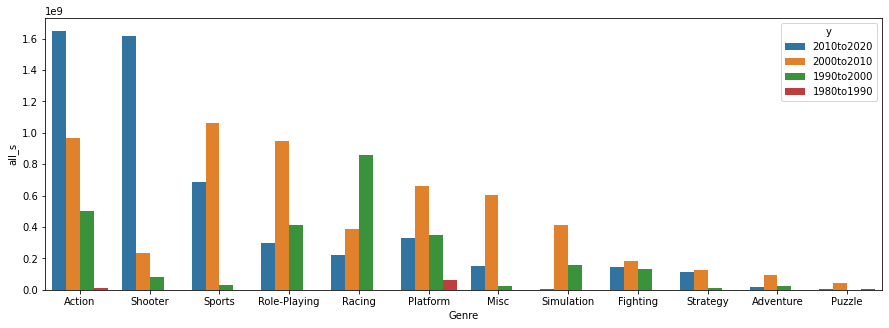

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Genre', y='all_s', hue='y', data=group_year)

In [47]:
group_year1 = df1.groupby(['Platform', 'y'], as_index=False)['all_s'].sum().sort_values(by='Platform', ascending=False)

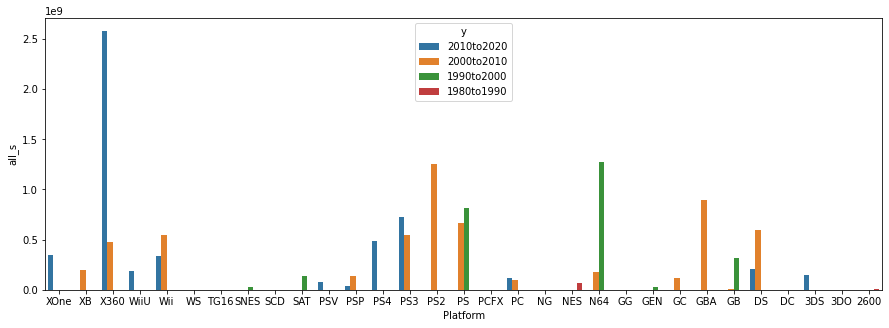

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Platform', y='all_s', hue='y', data=group_year1)

In [49]:
#가장 출시량이 많은 기준으로 정리 
df2 = df1.sort_values(by='all_s', ascending=False)

In [50]:
#상위 약 25%만 퍼블리셔 추출
z = df2['Publisher'].iloc[:4000].value_counts().to_frame()

In [86]:
z = z.drop(index = z[z['Publisher'] <= 50].index)
z

,Publisher
Electronic Arts,626
Nintendo,434
Activision,309
Sony Computer Entertainment,277
Ubisoft,252
THQ,197
Take-Two Interactive,159
Sega,151
Konami Digital Entertainment,137
Namco Bandai Games,128


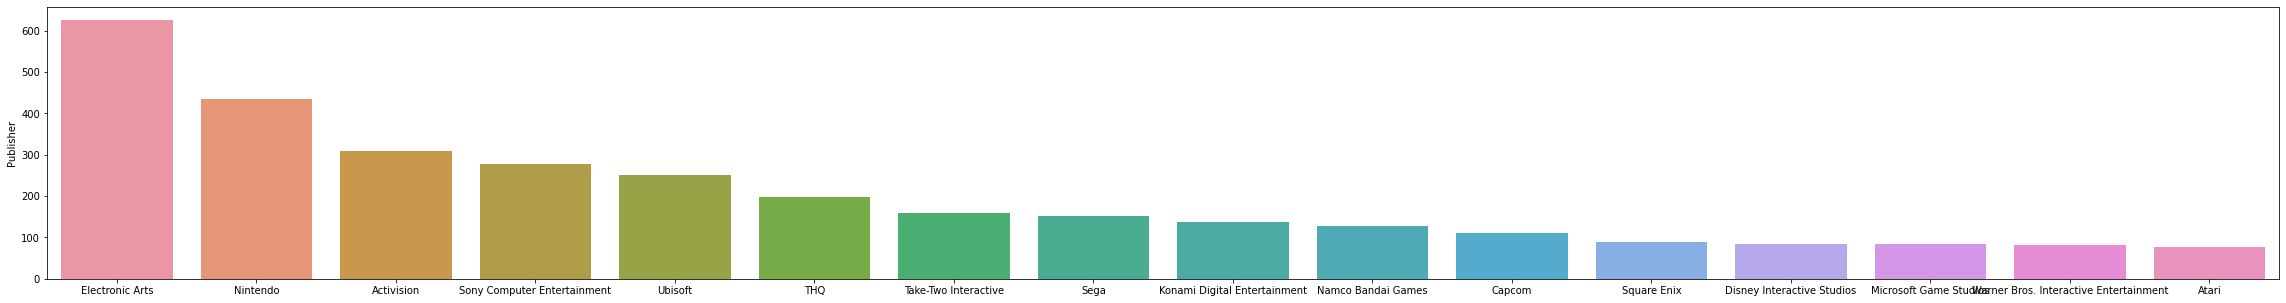

In [52]:
plt.figure(figsize=(40, 5))
sns.barplot(x=z.index , y='Publisher', data=z)

시각화를 통해 무슨 기준으로 데이터에 접근할지 기준점 파악

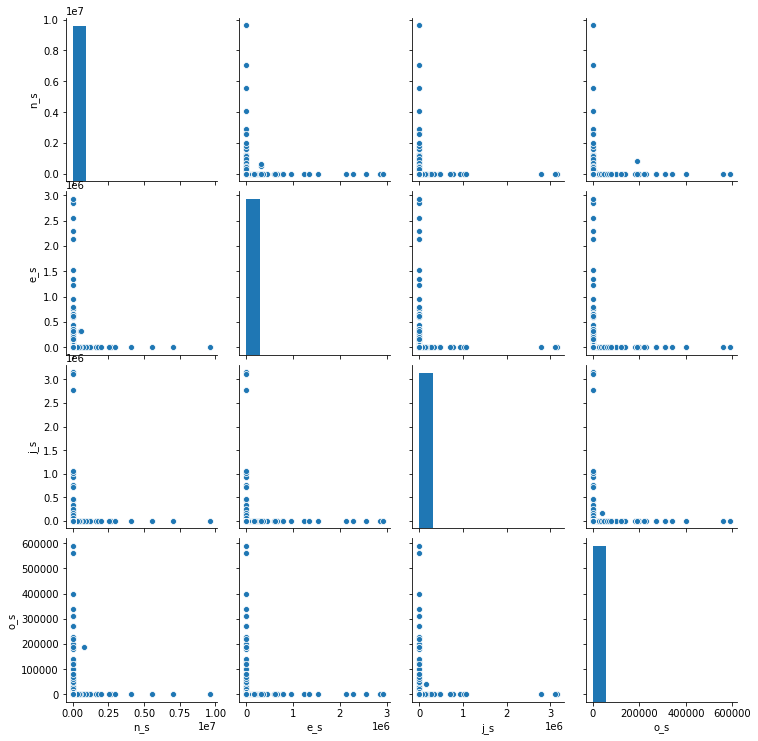

In [54]:
sns.pairplot(data2.iloc[:, 5:10])

n_s, j_s, e_s, o_s 모두 0이 압도적으로 많은 비율을 찾이하고 있는 것을 파악 가능, 따라서 스케일링이 필요
이상치 영향을 최소화할 수 있는 RobustScaler방법을 사용 -> 실패
Normalizer 시도

In [55]:
from sklearn.preprocessing import Normalizer

In [56]:
nor_scale = Normalizer()

In [57]:
train_scale2 = nor_scale.fit_transform(data2.iloc[:,5:9])

In [58]:
col2 = data2.columns[5:9]

In [59]:
sca_data2 = pd.DataFrame(data=train_scale2, columns=col2)

In [60]:
sca_data2

,n_s,e_s,j_s,o_s
0,1.000000,0.000000,0.000000,0.000000
1,0.998274,0.000000,0.000000,0.058722
2,0.000000,0.000000,1.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000
4,0.772988,0.579741,0.000000,0.257663
...,...,...,...,...
16236,0.964237,0.257130,0.000000,0.064282
16237,1.000000,0.000000,0.000000,0.000000
16238,0.884433,0.381914,0.060302,0.261310
16239,0.191180,0.191180,0.955899,0.114708


In [61]:
data2.update(sca_data2, overwrite=True)

In [62]:
data2

,Name,Platform,Genre,Publisher,year,n_s,e_s,j_s,o_s
0,Candace Kane's Candy Factory,DS,Action,Destineer,2008.0,1.000000,0.000000,0.000000,0.000000
1,The Munchables,Wii,Action,Namco Bandai Games,2009.0,0.998274,0.000000,0.000000,0.058722
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,2010.0,0.000000,0.000000,1.000000,0.000000
3,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,2010.0,1.000000,0.000000,0.000000,0.000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,Platform,D3Publisher,2010.0,0.772988,0.579741,0.000000,0.257663
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,Platform,Vivendi Games,2006.0,0.964237,0.257130,0.000000,0.064282
16237,Rainbow Islands: Revolution,PSP,Action,Rising Star Games,2005.0,1.000000,0.000000,0.000000,0.000000
16238,NBA 2K16,PS3,Sports,Take-Two Interactive,2015.0,0.884433,0.381914,0.060302,0.261310
16239,Toukiden: The Age of Demons,PSV,Action,Tecmo Koei,2013.0,0.191180,0.191180,0.955899,0.114708


In [63]:
data2['all_s'] = data2['n_s'] + data2['e_s'] + data2['j_s'] + data2['o_s']

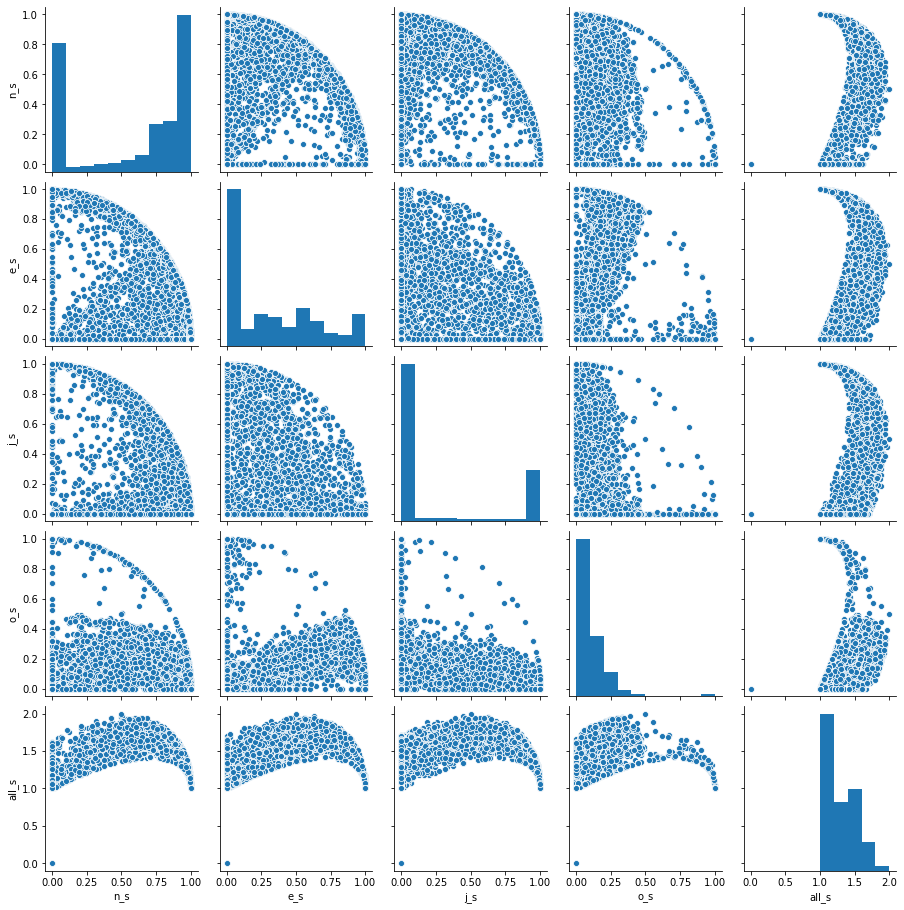

In [64]:
sns.pairplot(data2.iloc[:, 5:10])

가장 좋은 스케일러 변환은 정규화 스케일링 정규화 스케일링된 자료를 바탕으로 가설검정

In [65]:
#지역별 * 장르별
data_melt = data2.iloc[:, np.r_[2, 5:10]].copy()
region_data_melt = pd.melt(data_melt, id_vars='Genre', var_name='region', value_name='region_sales')

In [83]:
#지역별 * 플랫폼별
data_melt2 = data2.iloc[:, np.r_[1, 5:10]].copy()
region_data_melt2 = pd.melt(data_melt2, id_vars='Platform', var_name='region', value_name='region_sales')

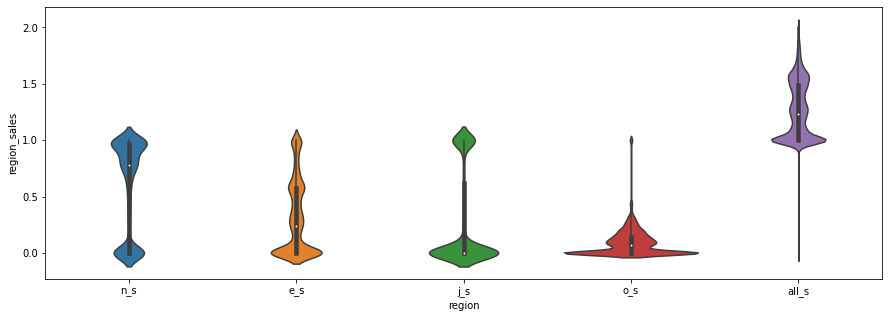

In [66]:
plt.figure(figsize=(15, 5))
sns.violinplot(y=region_data_melt['region_sales'], x=region_data_melt['region'])

In [67]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [68]:
model = ols('all_s ~ C(Genre)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,51.609510,4.691774,81.720809,1.356460e-180
Residual,16229.0,931.743033,0.057412,NaN,NaN


'장르별 출고량의 차이가 없다' 기각 -> '장르별 출고량의 차이가 있다' 채택

In [69]:
model = ols('all_s ~ C(Platform)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),30.0,162.836051,5.427868,107.232148,0.0
Residual,16210.0,820.516492,0.050618,NaN,NaN


'플랫폼별 출고량의 차이가 없다' 기각 -> '장르별 출고량의 차이가 있다' 채택

In [70]:
model = ols('all_s ~ C(Platform) * C(Genre)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),30.0,162.836051,5.427868,115.799008,0.000000e+00
C(Genre),11.0,33.317884,3.028899,64.619005,4.687728e-142
C(Platform):C(Genre),330.0,42.313601,0.128223,2.735531,1.424266e-52
Residual,15948.0,747.533557,0.046873,NaN,NaN


'플랫폼과 장르별에 따른 출고량 차이가 없다' 기각 -> '플랫폼과 장르별에 따른 출고량 차이가 있다' 채택

In [71]:
model = ols('region_sales ~ C(Genre) * C(region)', region_data_melt.drop(index = region_data_melt[region_data_melt['region'] == 'all_s'].index)).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,12.902377,1.172943,10.843478,2.653907e-20
C(region),3.0,2034.414485,678.138162,6269.165355,0.000000e+00
C(Genre):C(region),33.0,649.004410,19.666800,181.813132,0.000000e+00
Residual,64916.0,7021.990076,0.108170,NaN,NaN


'장르와 지역별에 따른 출고량의 차이가 없다' 기각 -> '장르와 지역별에 따른 출고량의 차이가 있다' 채택

In [84]:
model = ols('region_sales ~ C(Platform) * C(region)', region_data_melt2.drop(index = region_data_melt2[region_data_melt2['region'] == 'all_s'].index)).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),30.0,40.709013,1.356967,15.529052,2.424044e-79
C(region),3.0,2034.414485,678.138162,7760.573201,0.000000e+00
C(Platform):C(region),90.0,1977.307603,21.970084,251.424353,0.000000e+00
Residual,64840.0,5665.880248,0.087382,NaN,NaN


'플랫폼과 지역별에 따른 출고량의 차이가 없다' 기각 -> '플랫폼과 지역별에 따른 출고량의 차이가 있다' 채택

In [72]:
data2['year_term'] = np.nan
data2.loc[((1980 <= data2['year']) & (data2['year'] < 1985)), 'year_term'] = '1980to1985'
data2.loc[data2['year_term'] != '1980to1985' , 'year_term'] = '2015to2020'
data2.loc[((1985 <= data2['year']) & (data2['year'] < 1990)), 'year_term'] = '1985to1990'
data2.loc[((1990 <= data2['year']) & (data2['year'] < 1995)), 'year_term'] = '1990to1995'
data2.loc[((1995 <= data2['year']) & (data2['year'] < 2000)), 'year_term'] = '1995to2000'
data2.loc[((2000 <= data2['year']) & (data2['year'] < 2005)), 'year_term'] = '2000to2005'
data2.loc[((2005 <= data2['year']) & (data2['year'] < 2010)), 'year_term'] = '2005to2010'
data2.loc[((2000 <= data2['year']) & (data2['year'] < 2015)), 'year_term'] = '2010to2015'

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16241 non-null  object 
 1   Platform   16241 non-null  object 
 2   Genre      16241 non-null  object 
 3   Publisher  16241 non-null  object 
 4   year       16241 non-null  float64
 5   n_s        16241 non-null  float64
 6   e_s        16241 non-null  float64
 7   j_s        16241 non-null  float64
 8   o_s        16241 non-null  float64
 9   all_s      16241 non-null  float64
 10  year_term  16241 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [74]:
model = ols('all_s ~ C(year_term) * C(Genre)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year_term),5.0,7.232569,1.446514,25.608565,7.875806e-26
C(Genre),11.0,53.981624,4.907420,86.879225,4.067702e-192
C(year_term):C(Genre),55.0,8.815047,0.160274,2.837426,1.532610e-11
Residual,16172.0,913.484229,0.056486,NaN,NaN


'년도와 장르별에 따른 출고량 차이가 없다' 기각 -> '년도와 장르별에 따른 출고량 차이가 있다' 채택

In [75]:
model = ols('all_s ~ C(year_term) * C(Platform)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year_term),5.0,7.232569,1.446514,28.980116,2.212945e-29
C(Platform),30.0,163.828787,5.460960,109.407354,0.000000e+00
C(year_term):C(Platform),150.0,10.521211,0.070141,1.405245,8.391853e-04
Residual,16180.0,807.608657,0.049914,NaN,NaN


'년도와 플랫폼별에 따른 출고량 차이가 없다' 기각 -> '년도와 플랫폼별에 따른 출고량 차이가 있다' 채택

In [85]:
model = ols('all_s ~ C(Publisher) * C(Genre)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Publisher),574.0,195.900719,0.341290,7.139893,0.000000e+00
C(Genre),11.0,22.593576,2.053961,42.969456,8.250770e-93
C(Publisher):C(Genre),6314.0,317.173021,0.050233,1.050895,9.738149e-03
Residual,14421.0,689.330986,0.047800,NaN,NaN


In [76]:
model = ols('all_s ~ C(year_term) * C(Platform) * C(Genre)', data2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year_term),5.0,7.232569,1.446514,31.437016,5.730596e-32
C(Platform),30.0,163.828787,5.460960,118.682778,0.000000e+00
C(Genre),11.0,33.292245,3.026568,65.776254,1.257549e-144
C(year_term):C(Platform),150.0,9.845128,0.065634,1.426425,5.076453e-04
C(year_term):C(Genre),55.0,5.654674,0.102812,2.234414,4.578483e-07
C(Platform):C(Genre),330.0,39.631844,0.120096,2.610052,3.459621e-47
C(year_term):C(Platform):C(Genre),1650.0,79.332935,0.048081,1.044933,1.115978e-01
Residual,15752.0,724.797956,0.046013,NaN,NaN


'년도, 장르, 플랫폼별에 따른 출고량은 차이가 없다' 채택

결론: 2022년인 지금 2010~2020년 자료를 바탕으로 인기가 좋은 게임은 액션, 슈팅게임 등 게임이라 할 수 있으며, 플랫폼으로는 xbox360나 PS 지원하도록 하며, 액션게임이나 슈팅게임은 북미유저를 기반으로 생각하면 좋을것이라는 점, 퍼블리셔또한 중요한 선택의 영역이라 할 수 있을겁니다.